# IMPORTS

In [2]:
import umap.umap_ as umap
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 10

from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors, PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors

# LOAD DATAFRAME

In [75]:
####### Make the loaded data into dataframes
data = pd.read_csv("umap_reduced_data.csv")
display(data)

,SMILES,ID,UMAP1,UMAP2
0,CO[C@@H](C)C(=O)NC1(C2CCN(C(=O)c3nccnc3N)C2)CC1,PV-003877713436,1.710962,-6.205804
1,O=C(NC[C@@H]1CCCN1C(=O)C1(F)CCOC1)c1nccnc1O,PV-003838897022,-5.585312,-2.810323
2,CN(Cc1ccsc1)C(=O)C(F)(F)c1cnccn1,Z3339321974,1.358491,5.135318
3,CN(Cc1cnccn1)C(=O)C1(F)CCN(C(=O)OC(C)(C)C)C1,Z1333447536,-5.086095,-4.767839
4,Cc1cnc(C(=O)N[C@H]2C[C@H](O)CN(C(=O)CC3CC34CC4...,PV-009636985494,-5.709881,1.099231
...,...,...,...,...
9920,CC1(C)CCC(CC(=O)O)N(Cc2cncc(F)n2)C1,pyridine2pyrazine_0000001699,16.756191,0.569325
9921,Cc1cnc(CNC(=O)C2CCN(C(C)C)CC2)cn1,pyridine2pyrazine_0000001700,-2.325722,-5.101502
9922,CC1(C(=O)OCc2cnc(OC3CCOCC3)cn2)CCC(=O)NC1,pyridine2pyrazine_0000001701,-3.228617,-6.162548
9923,CNc1cnc(C(=O)N[C@]2(C)C[C@H](NC(=O)C3CCN(C)C3)...,pyridine2pyrazine_0000001702,-4.158220,-8.519188


# PLOTS

In [58]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Function to categorize IDs based on their prefixes
# def categorize_id(id_str):
#     if id_str.startswith("pyridine"):
#         return "Pyridine"
#     elif id_str.startswith("pyridazine"):
#         return "Pyridazine"
#     elif id_str.startswith("pyrimidine"):
#         return "Pyrimidine"
#     elif id_str.startswith("pyrrole"):
#         return "Pyrrole"
#     else:
#         return "original"

# # Apply the function to create a new category column
# data['Category'] = data['ID'].apply(categorize_id)

# plt.figure(figsize=(5, 5))
# sns.scatterplot(x='UMAP1', y='UMAP2', data=data, hue='Category',
#                 s=50, alpha=0.2, linewidth=0.2, color='grey',palette='tab10')

# plt.show()

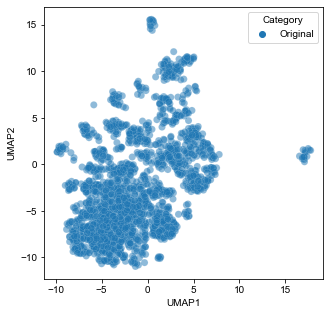

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to categorize IDs based on their prefixes
def categorize_id(id_str):
    if id_str.startswith("pyridine2"):
        return "Pyridine"
    elif id_str.startswith("pyridazine2"):
        return "Pyridazine"
    elif id_str.startswith("pyrimidine2"):
        return "Pyrimidine"
    elif id_str.startswith("pyrrole2"):
        return "Pyrrole"
    else:
        return "Original"

# Apply the function to create a new category column
data['Category'] = data['ID'].apply(categorize_id)

# List of categories you want to plot
categories_to_plot = ["Original"]

# Filter the DataFrame to include only the selected categories
filtered_data = data[data['Category'].isin(categories_to_plot)]

plt.figure(figsize=(5, 5))
sns.scatterplot(x='UMAP1', y='UMAP2', data=filtered_data, hue='Category',
                s=50, alpha=0.5, linewidth=0.2, palette='tab10')

# plt.savefig('umap_plot.png')
plt.show()

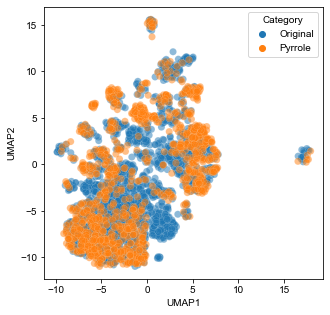

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt


# Function to categorize IDs based on their prefixes
def categorize_id(id_str):
    if id_str.startswith("pyridine2"):
        return "Pyridine"
    elif id_str.startswith("pyridazine2"):
        return "Pyridazine"
    elif id_str.startswith("pyrimidine2"):
        return "Pyrimidine"
    elif id_str.startswith("pyrrole2"):
        return "Pyrrole"
    else:
        return "Original"

# Apply the function to create a new category column
data['Category'] = data['ID'].apply(categorize_id)

# List of categories you want to plot
categories_to_plot = ["Pyrrole", "Original"]

# Filter the DataFrame to include only the selected categories
filtered_data = data[data['Category'].isin(categories_to_plot)]

plt.figure(figsize=(5, 5))
sns.scatterplot(x='UMAP1', y='UMAP2', data=filtered_data, hue='Category',
                s=50, alpha=0.5, linewidth=0.2, palette='tab10')

plt.show()